# Programación Lineal

In [2]:
import picos
import numpy as np

P = picos.Problem()

x = picos.RealVariable('x', (2, 3), lower=0)

c = np.array([
    [300, 300, 300],
    [420, 420, 420]
])
t = np.array([
    [100, 190, 160],
    [180, 110, 140]
])

d = [4, 20, 6]
C = [21, 13]

P.set_objective('min', picos.sum([
    (c[i, j] + t[i, j]) * x[i, j]
    for i in range(2)
    for j in range(3)
]))

for j in range(3):
    P.add_constraint(picos.sum(x[:, j]) == d[j])

for i in range(2):
    P.add_constraint(picos.sum(x[i, :]) <= C[i])

P.solve(solver='glpk')
print(f"x = {x.value}")
print(f"Z = {P.value}")

x = [ 4.00e+00  1.10e+01  6.00e+00]
[ 0.00e+00  9.00e+00  0.00e+00]

Z = 14520.0


# Programación Entera Mixta

In [3]:
import picos
import numpy as np

P = picos.Problem()

# Variables
x = picos.RealVariable('x', 4, lower=0)
y = picos.BinaryVariable('y', 4)
I = picos.RealVariable('I', 4, lower=0)

# Parametros
d = [20, 15, 22, 13]  # demandas semanales
M = 100  # constante grande

# Funcion objetivo
P.set_objective('min', picos.sum([
    75 * y[i] + 1.8 * x[i] + 0.15 * I[i] 
    for i in range(4)
]))

# Restricciones de balance de inventario
I_prev = 0  # inventario inicial
for t in range(4):
    P.add_constraint(I[t] == I_prev + x[t] - d[t])
    I_prev = I[t]

# Restricciones de capacidad
for t in range(4):
    P.add_constraint(0.6 * x[t] + 1.5 * y[t] <= 18)

# Restricciones de setup obligatorio
for t in range(4):
    P.add_constraint(x[t] <= M * y[t])

# Inventario final nulo
P.add_constraint(I[3] == 0)

P.solve(solver='glpk')
print(f"x = {x.value}")
print(f"y = {y.value}")
print(f"I = {I.value}")
print(f"Z = {P.value}")

x = [ 2.00e+01]
[ 2.25e+01]
[ 2.75e+01]
[ 1.78e-15]

y = [ 1.00e+00]
[ 1.00e+00]
[ 1.00e+00]
[ 0.00e+00]

I = [ 0.00e+00]
[ 7.50e+00]
[ 1.30e+01]
[ 0.00e+00]

Z = 354.075


# Programación No Lineal

In [4]:
import numpy as np

# Datos
a = np.array([100, 80, 90])
B = np.array([[8, 1.5, 1],
              [1.5, 6, 1.5],
              [1, 1.5, 7]])
c = np.array([20, 18, 22])

# Hessiano
H = -2 * B
print("Hessiano:")
print(H)

# Menores principales
m1 = H[0, 0]
m2 = np.linalg.det(H[:2, :2])
m3 = np.linalg.det(H)

print(f"Menor 1x1: {m1}")
print(f"Menor 2x2: {m2}")
print(f"Menor 3x3: {m3}")

Hessiano:
[[-16.  -3.  -2.]
 [ -3. -12.  -3.]
 [ -2.  -3. -14.]]
Menor 1x1: -16.0
Menor 2x2: 183.00000000000009
Menor 3x3: -2406.0000000000014


In [5]:
# Calculo de precios optimos
p_opt = 0.5 * np.linalg.inv(B) @ (a + B.T @ c)
print(f"Precios optimos: {p_opt}")

# Verificacion: gradiente debe ser cero
gradiente = a - 2*B@p_opt + B.T@c
print(f"Gradiente en p*: {gradiente}")

# Beneficio optimo
beneficio_opt = p_opt.T @ a - c.T @ a - p_opt.T @ B @ p_opt + c.T @ B @ p_opt
print(f"Beneficio optimo: {beneficio_opt}")

Precios optimos: [14.85037406 13.24771405 15.82543641]
Gradiente en p*: [-5.68434189e-14 -2.84217094e-14  0.00000000e+00]
Beneficio optimo: 839.5719035743969


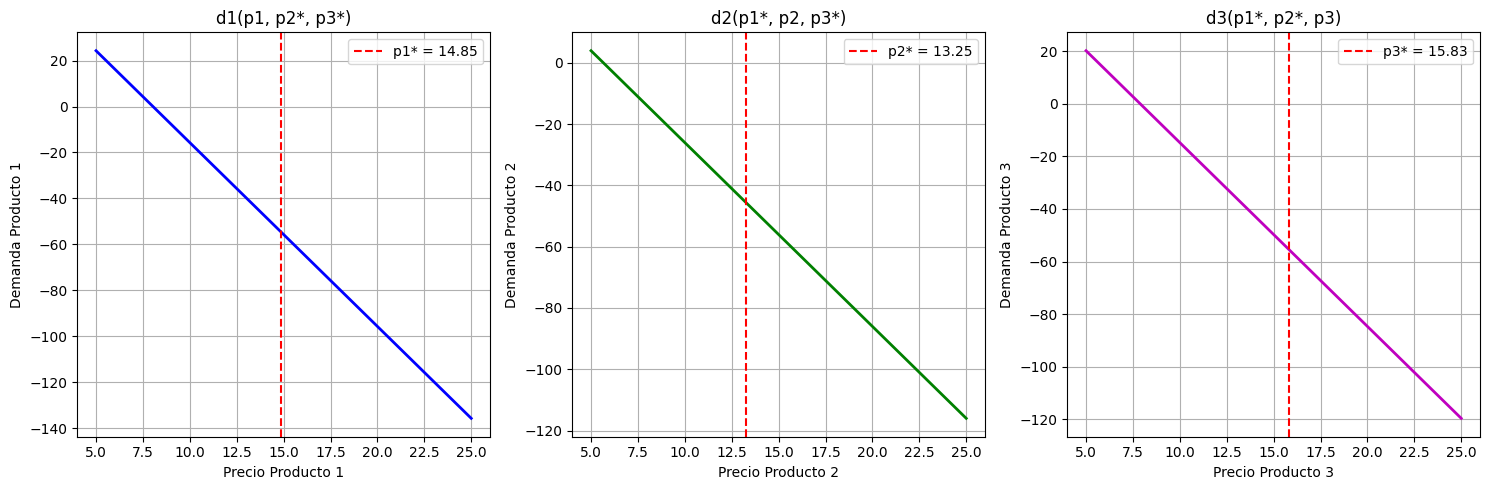

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Precios optimos
p_opt = np.array([14.85, 13.25, 15.83])

# Rangos de precios para analisis OAT
p1_range = np.linspace(5, 25, 100)
p2_range = np.linspace(5, 25, 100) 
p3_range = np.linspace(5, 25, 100)

# Demandas ceteris paribus
d1_oat = 100 - 8*p1_range - 1.5*p_opt[1] - p_opt[2]
d2_oat = 80 - 1.5*p_opt[0] - 6*p2_range - 1.5*p_opt[2]
d3_oat = 90 - p_opt[0] - 1.5*p_opt[1] - 7*p3_range

# Graficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(p1_range, d1_oat, 'b-', linewidth=2)
axes[0].axvline(p_opt[0], color='r', linestyle='--', label=f'p1* = {p_opt[0]:.2f}')
axes[0].set_xlabel('Precio Producto 1')
axes[0].set_ylabel('Demanda Producto 1')
axes[0].set_title('d1(p1, p2*, p3*)')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(p2_range, d2_oat, 'g-', linewidth=2)
axes[1].axvline(p_opt[1], color='r', linestyle='--', label=f'p2* = {p_opt[1]:.2f}')
axes[1].set_xlabel('Precio Producto 2')
axes[1].set_ylabel('Demanda Producto 2')
axes[1].set_title('d2(p1*, p2, p3*)')
axes[1].grid(True)
axes[1].legend()

axes[2].plot(p3_range, d3_oat, 'm-', linewidth=2)
axes[2].axvline(p_opt[2], color='r', linestyle='--', label=f'p3* = {p_opt[2]:.2f}')
axes[2].set_xlabel('Precio Producto 3')
axes[2].set_ylabel('Demanda Producto 3')
axes[2].set_title('d3(p1*, p2*, p3)')
axes[2].grid(True)
axes[2].legend()

plt.tight_layout()
plt.show()